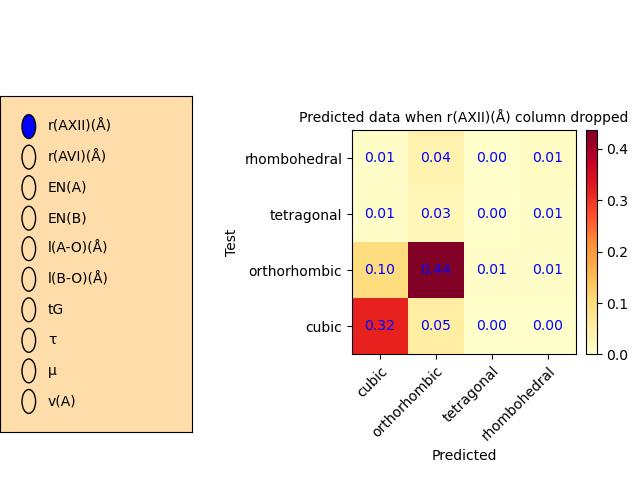

In [1]:
%matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import RadioButtons
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# plot confusion matrix
fig, ax = plt.subplots()
col = ['r(AXII)(Å)','r(AVI)(Å)','EN(A)','EN(B)',"l(A-O)(Å)",'l(B-O)(Å)','tG','τ','μ','v(A)']
structure = ["cubic","orthorhombic","tetragonal","rhombohedral"]
array = pd.read_csv('r(AXII)(Å).csv',index_col=[0])
array = np.array(array)
img = ax.imshow(array, cmap='YlOrRd', origin='lower')
#bar  = plt.colorbar(img, )
axins = inset_axes(ax,
                    width="5%",  
                    height="100%",
                    loc='center right',
                    borderpad=-1.5
                   )
fig.colorbar(img, cax=axins, orientation = "vertical")
plt.subplots_adjust(left=0.55)
for i in range(len(array)):
    for j in range(len(array)):
        text = ax.text(j, i, '%.2f' % array[i, j],
                       ha="center", va="center", color="b")

# label
def set_labels():
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Test')
    fig.set_label('Predicted vs Test')
    # set tick labels
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels(structure)
    ax.set_yticks([0, 1, 2, 3])
    ax.set_yticklabels(structure)
    ax.set_title(f"Predicted data when {col[0]} column dropped", fontsize =10)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

set_labels()

#Rotate ticks
#plt.xticks(rotation = 90)

# create radio box
radio_ax = plt.axes([0.0, 0.1, 0.3, 0.7], facecolor='#FFDDAA')

# create radio buttons
radio = RadioButtons(radio_ax, col)

# callback function to run when buttons are pressed
def callback(label):
    ax.cla()
    set_labels()
    array = pd.read_csv(f'{label}.csv',index_col=[0])
    array = np.array(array)
    #clear(array)
    for i in range(len(array)):
        for j in range(len(array)):
            text = ax.text(j, i, '%.2f' % array[i, j],
                        ha="center", va="center", color="b")
    ax.imshow(array, cmap='YlOrRd', origin='lower')
    ax.set_title(f"Predicted data when {label} column dropped", fontsize =10)
    return text
# connect function to radio object and show
radio.on_clicked(callback)
plt.show()